In [2]:
# Naložimo knjižnjice in funkcije
from sage.all import graphs
from metahevristika import simulated_annealing_subpath
import csv
import time
import os
import pandas as pd
import matplotlib.pyplot as plt
from funkcije2 import Ln_graph, build_caterpillar, build_caterpillar2, subpath_number, cubic_graphs, encode_time_hms, build_tree, show_build_tree_tree_layout, spanning_tree, tree_layout_positions_from_tree

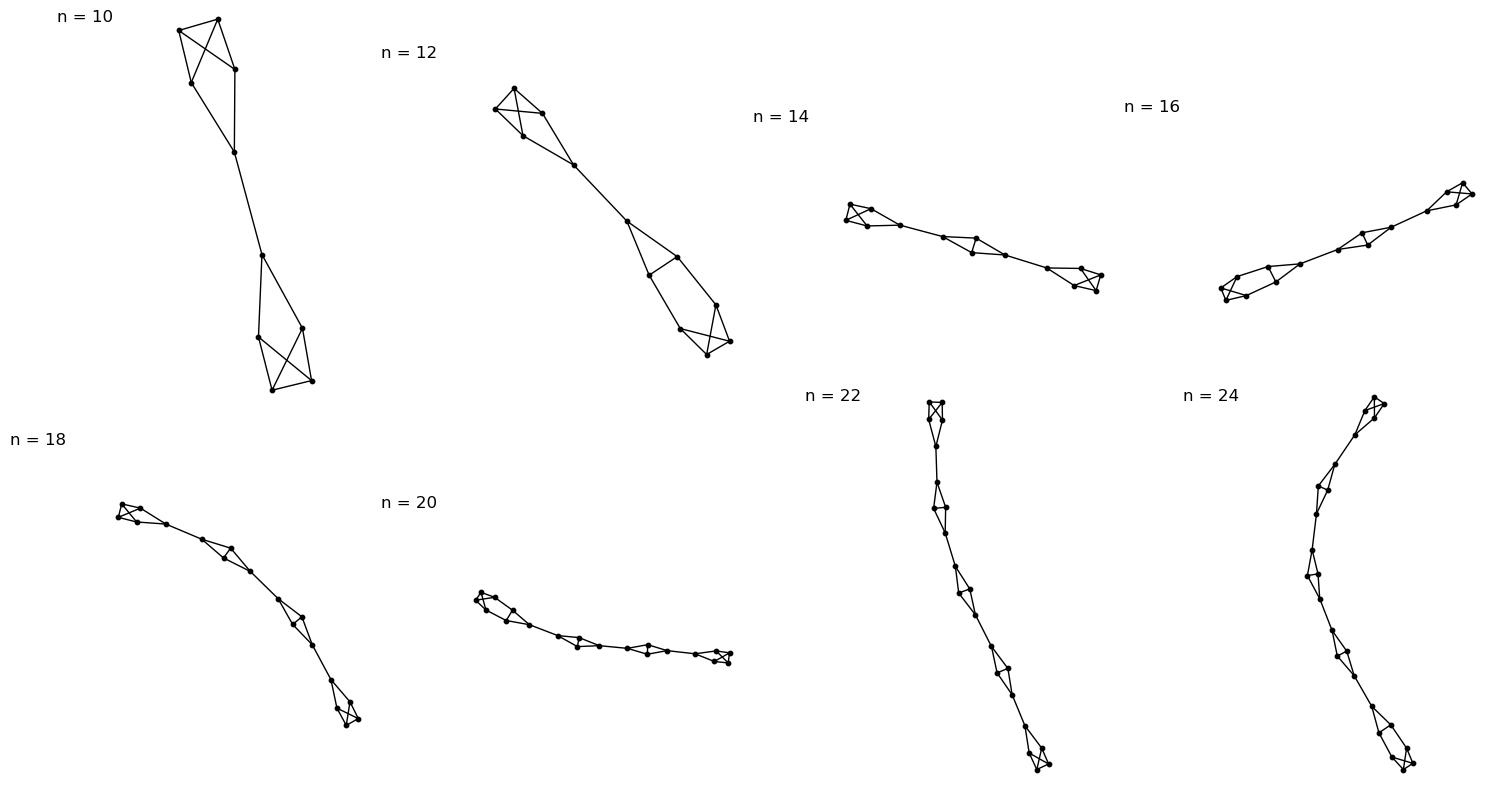

In [12]:
# Preizkusimo funkcijo Ln_graphs

Ln_plots = []
for n in range(10, 27, 2):
    # narisan graf
    Gplot = Ln_graph(n).plot(
        layout="spring",
        vertex_size=10,
        vertex_color="black",
        vertex_labels=False,
        edge_thickness=1,
        iterations=200
    )

    # izklopimo osi, da so grafi čisti
    Gplot.axes(False)
    # naslov nad grafom (v relativnih koordinatah figure)
    title = text(
        f"n = {n}",
        (0.5, 1),
        horizontal_alignment='center',
        color='black',
        fontsize=12
    )
    Ln_plots.append(Gplot + title)

row1 = Ln_plots[:4]
row2 = Ln_plots[4:8]

GA = graphics_array([row1, row2])
GA.show(figsize=(15, 8), axes=False)

In [ ]:
# Preverimo koliko je vseh kubičnih grafov za vsak n
# NE POGANJAJ ZNOVA: Trajalo je 110min
for n in range(4,23,2):
    c = sum(1 for _ in cubic_graphs(n))
    print(f"n={n} število grafov: {c}")

n=4 število grafov: 1
n=6 število grafov: 2
n=8 število grafov: 5
n=10 število grafov: 19
n=12 število grafov: 85
n=14 število grafov: 509
n=16 število grafov: 4060
n=18 število grafov: 41301
n=20 število grafov: 510489
n=22 število grafov: 7319447


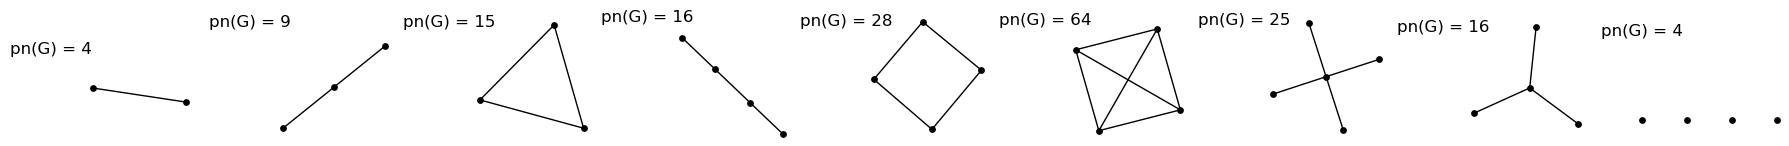

In [3]:
# preverjamo delovanje funkcije subpath_number na enostavnih grafih
graphs_list = [
    # 2. P2: pot s 2 vozlišči
    Graph({0:[1]}),
    # 3. Zvezda S3: center 0, listi 1 in 2
    Graph({0:[1,2]}),
    # 3. C3: trikotnik
    Graph({0:[1,2], 1:[2]}),
    # 4. Potni graf P4
    Graph({0:[1], 1:[2], 2:[3]}),
    # 4. Cikel C4
    Graph({0:[1,3], 1:[2], 2:[3]}),
    # 4. Popoln graf K4
    graphs.CompleteGraph(4),
    # 4. Zvezda S4
    graphs.StarGraph(4),
    # 4. Drevo v obliki črke T
    Graph({0:[1,2,3]}),
    # 4. Diskretni graf na 4 vozliščih
    Graph(4)
]

plots = []
for G in graphs_list:
    # narisan graf
    Gplot = G.plot(
        layout="spring",
        vertex_size=15,
        vertex_color="black",
        vertex_labels=False,
        edge_thickness=1,
        iterations=200
    )

    # izklopimo osi, da so grafi čisti
    Gplot.axes(False)
    # naslov nad grafom (v relativnih koordinatah figure)
    title = text(
        f"pn(G) = {subpath_number(G)}",
        (0.5, 1),
        horizontal_alignment='center',
        color='black',
        fontsize=12
    )
    plots.append(Gplot + title)

# prikaz v eni vrstici
graphics_array([plots]).show(figsize=(18,3), axes=False)

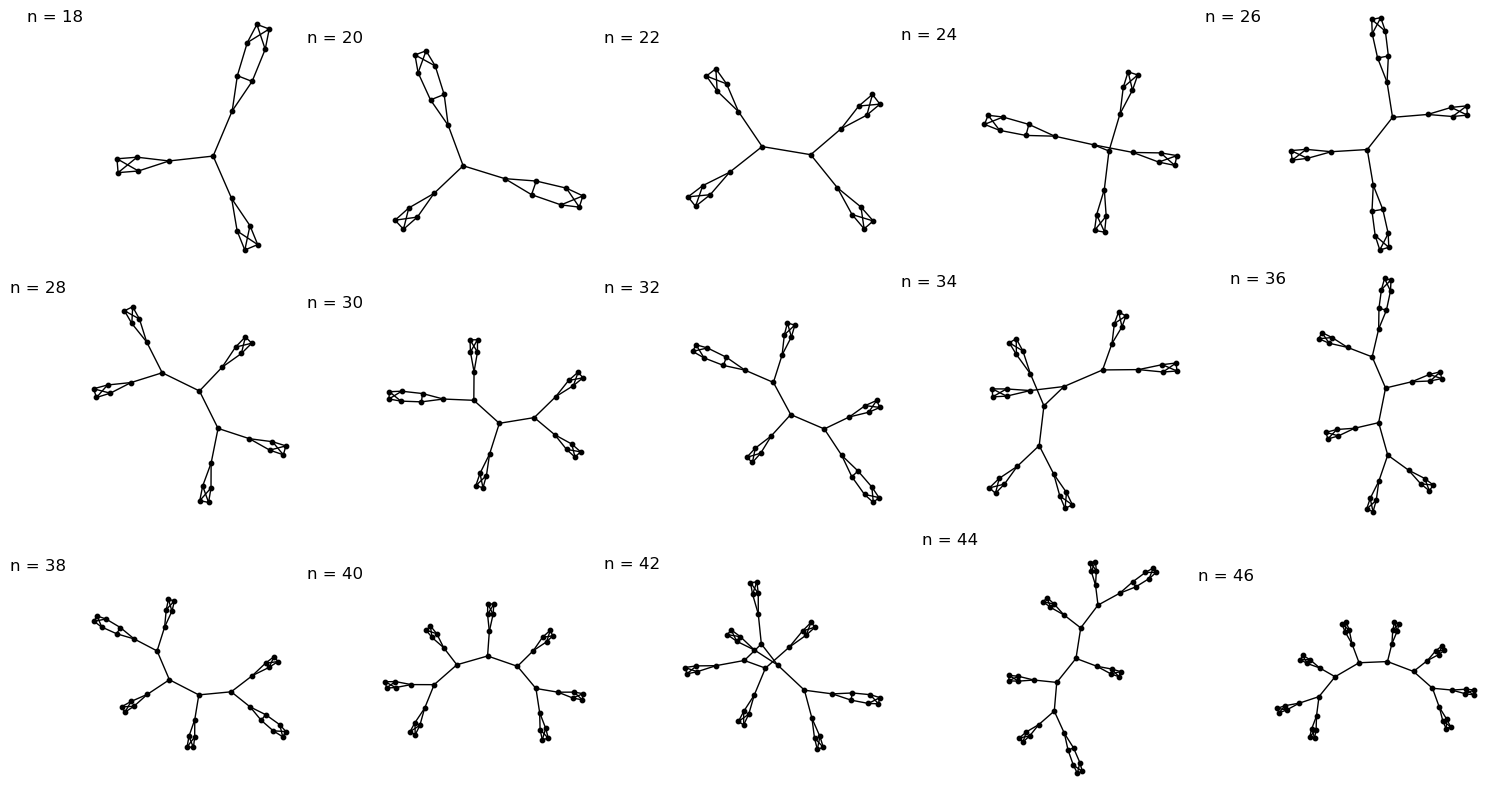

In [11]:
# Preizkusimo funkcijo build_caterpillar

star_plots = []
for n in range(18, 47, 2):
    # narisan graf
    Gplot = build_caterpillar(n).plot(
        layout="spring",
        vertex_size=10,
        vertex_color="black",
        vertex_labels=False,
        edge_thickness=1,
        iterations=400
    )

    # izklopimo osi, da so grafi čisti
    Gplot.axes(False)
    # naslov nad grafom (v relativnih koordinatah figure)
    title = text(
        f"n = {n}",
        (0.5, 1),
        horizontal_alignment='center',
        color='black',
        fontsize=12
    )
    star_plots.append(Gplot + title)

row1 = star_plots[:5]
row2 = star_plots[5:10]
row3 = star_plots[10:15]

GA = graphics_array([row1, row2, row3])
GA.show(figsize=(15, 8), axes=False)

## Prva točka

Tu je cilj preveriti pravilnost trditve za čim večje n, kjer Ln **primerjamo z vsemi možnimi kubičnimi grafi** na n vozliščih

Shranili bomo:

        - CSV boljših grafov od Ln

Za csv n = 16 je trajalo 1,5 min (4060 grafov), za n = 18: 80 min (41301 grafov) -> **za n = 20 je 510489 grafov**

In [10]:
start_time = time.time()

os.makedirs("Data", exist_ok=True)

for n in range(10, 19, 2):
    file_n = os.path.join("Data", f"boljsi_Ln_n{n}.csv")

    # VAROVALO: če datoteka že obstaja, je ne povozi in preskoči n
    if os.path.exists(file_n):
        print(f"Preskok n = {n} | datoteka že obstaja: {file_n}")
        continue
        
    start = time.time()

    # Ustvari/odpri CSV za trenutni n
    with open(file_n, mode="w", newline="") as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(["n", "graph6", "pn(G)", "pn(Ln)", "pn(star)"])

        Ln = Ln_graph(n)
        pn = subpath_number(Ln)
        star = build_catterpillar(n)
        pn2 = subpath_number(star)


        written = 0 

        for G in cubic_graphs(n):
            pnG = subpath_number(G)
            if pnG < pn:
                writer.writerow([n, G.graph6_string(), pnG, pn, pn2])
                written += 1

    elapsed_total = time.time() - start_time
    end = time.time() - start

    print(f"Zaključil n = {n} | datoteka: {file_n} | zapisov: {written+1} | čas n: {encode_time_hms(end)} | skupni: {encode_time_hms(elapsed_total)}")


Preskok n = 10 | datoteka že obstaja: Data/boljsi_Ln_n10.csv
Preskok n = 12 | datoteka že obstaja: Data/boljsi_Ln_n12.csv
Preskok n = 14 | datoteka že obstaja: Data/boljsi_Ln_n14.csv
Preskok n = 16 | datoteka že obstaja: Data/boljsi_Ln_n16.csv
Preskok n = 18 | datoteka že obstaja: Data/boljsi_Ln_n18.csv


In [35]:
# Probamo najti en protiprimer za caterpillar graf za n = 20
n = 20
G = build_caterpillar2(n)
pnG = subpath_number(G)
count = 0
start = time.time()
nasel = False
print(f"Primerjamo s pn(Cat2) = {pnG}")
    
for H in cubic_graphs(n):
    count += 1
    pnH = subpath_number(H)
    if pnH < pnG:
        print(f"Našel boljši graf za n = {n} | pn(H) = {pnH}!",
              f"Šel sem čez {count} grafov")
        H.show(
            vertex_size=10,
            vertex_color="black",
            vertex_labels=False,
            edge_thickness=1,
            figsize=[3, 3],
            iterations=400
        )
        nasel = True
        break

    if count % 10000 == 0:
        elapsed = time.time() - start
        print(f"Obdelal: {count} grafov v {encode_time_hms(elapsed)}")

if not nasel:
    print("Boljšega grafa ni!")


Primerjamo s pn(Cat2) = 11708
Obdelal: 10000 grafov v 00:07:06.221
Obdelal: 20000 grafov v 00:14:27.648
Obdelal: 30000 grafov v 00:22:14.628
Obdelal: 40000 grafov v 00:29:35.814
Obdelal: 50000 grafov v 00:35:44.268
Obdelal: 60000 grafov v 00:42:34.081
Obdelal: 70000 grafov v 00:49:09.584
Obdelal: 80000 grafov v 00:56:37.978
Obdelal: 90000 grafov v 01:04:05.114
Obdelal: 100000 grafov v 01:10:53.640
Obdelal: 110000 grafov v 01:18:30.326
Obdelal: 120000 grafov v 01:25:39.490
Obdelal: 130000 grafov v 01:32:43.527
Obdelal: 140000 grafov v 01:39:43.527
Obdelal: 150000 grafov v 01:46:13.215
Obdelal: 160000 grafov v 01:52:35.768
Obdelal: 170000 grafov v 01:58:02.642
Obdelal: 180000 grafov v 02:04:41.769
Obdelal: 190000 grafov v 02:11:30.471
Obdelal: 200000 grafov v 02:17:39.008
Obdelal: 210000 grafov v 02:23:39.574
Obdelal: 220000 grafov v 02:30:03.610
Obdelal: 230000 grafov v 02:36:50.532
Obdelal: 240000 grafov v 02:43:48.752
Obdelal: 250000 grafov v 02:51:34.025
Obdelal: 260000 grafov v 02:5

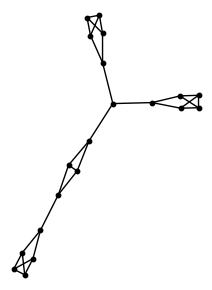

In [4]:
build_caterpillar2(20).show(
            vertex_size=10,
            vertex_color="black",
            vertex_labels=False,
            edge_thickness=1,
            figsize=[3, 3],
            iterations=400
        )

In [ ]:
folder = "Data"
dfs = []

for file in os.listdir(folder):
    if file.lower().startswith("boljsi_"):
        path = os.path.join(folder, file)
        df = pd.read_csv(path)
        df["source_file"] = file  # dodamo informacijo, iz katere datoteke prihaja
        dfs.append(df)

df = pd.concat(dfs, ignore_index=True) if dfs else pd.DataFrame()

,n,graph6,pn(G),pn(Ln),pn(star),source_file
0,18,Q????A?WC`QCF?B_@W?M?WO@_O?,22464,22532,7072,boljsi_Ln_n18.csv
1,18,Q????A?WC`QCF?Ao@W?M?X?@_O?,16908,22532,7072,boljsi_Ln_n18.csv
2,18,Q????B?K?WWOo_KCEG?F?BO?KG?,7692,22532,7072,boljsi_Ln_n18.csv
3,18,Q????B?K?WWCw?CcCW?e?BO?KG?,20064,22532,7072,boljsi_Ln_n18.csv
4,18,Q????B?K?WWCw??sCW?e?F??KG?,21516,22532,7072,boljsi_Ln_n18.csv
5,18,Q????B?K?WWCo_KCCW?e?BO?KG?,17440,22532,7072,boljsi_Ln_n18.csv
6,18,Q????B?K?WWCo_GSEG?e?B_?KG?,7488,22532,7072,boljsi_Ln_n18.csv
7,18,Q???C@?g?oGcPGgOCQ?M?E_?WG?,16512,22532,7072,boljsi_Ln_n18.csv
8,18,Q???C@?g?oSAPGPGCW?M?E_?WG?,12832,22532,7072,boljsi_Ln_n18.csv
9,18,Q???C@?g?oSAEAEOCgAK?@g@A_?,19392,22532,7072,boljsi_Ln_n18.csv


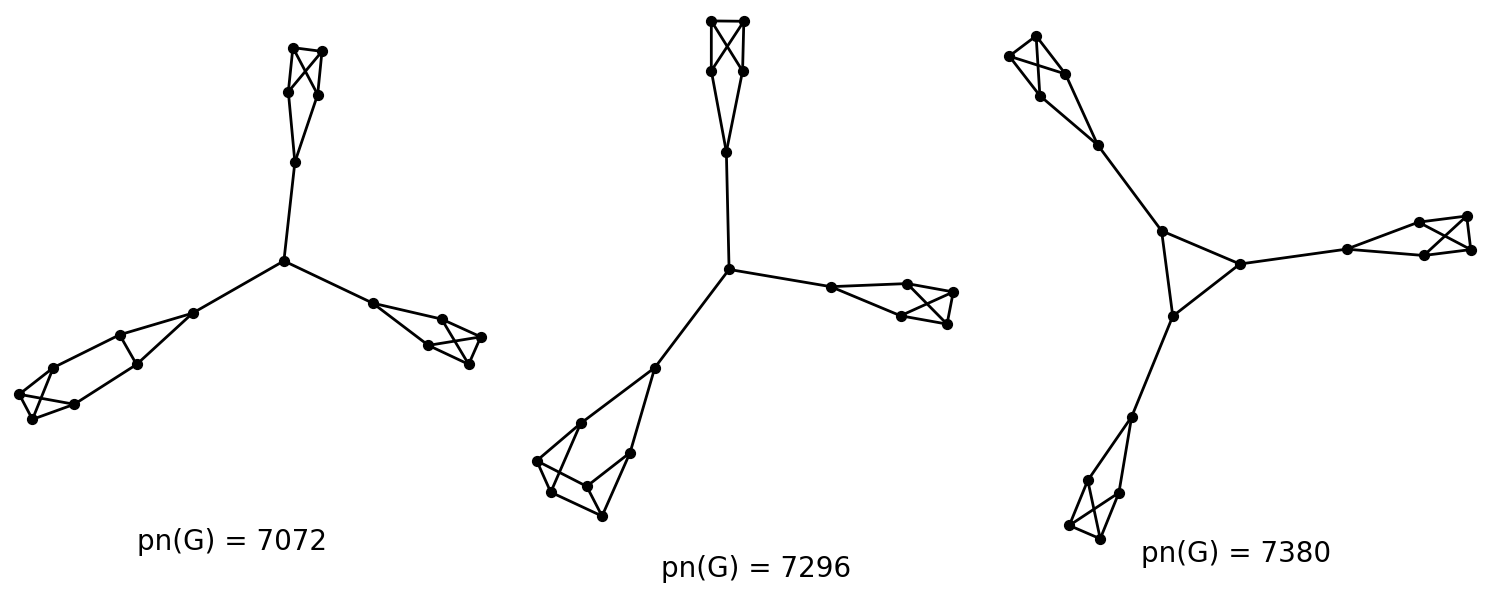

In [152]:
df_f = df[df["n"] == 18].copy()
df_f = df_f.sort_values("pn(G)")
df_min3 = df_f.head(int(3))
slov = dict(zip(df_min3["graph6"], df_min3["pn(G)"]))

plots = []
for G6, pnG in slov.items():
    G = Graph(G6)
    # narisan graf
    Gplot = G.plot(
        layout="spring",
        vertex_size=50,
        vertex_color="black",
        vertex_labels=False,
        edge_thickness=2,
        iterations=500
    )

    # izklopimo osi, da so grafi čisti
    Gplot.axes(False)
    # naslov nad grafom (v relativnih koordinatah figure)
    title = text(
        f"pn(G) = {pnG}",
        (1.8, -1),
        horizontal_alignment='center',
        color='black',
        fontsize=20
    )
    plots.append(Gplot + title)

row1 = plots

GA = graphics_array([row1])
GA.show(figsize=(15, 6), axes=False)

## Simulated annealing

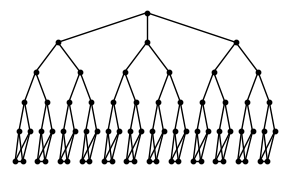

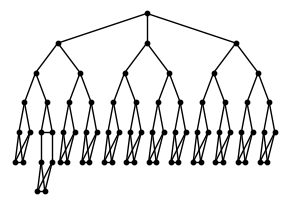

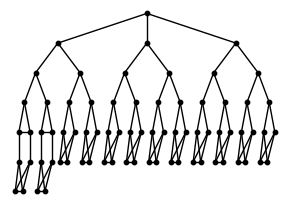

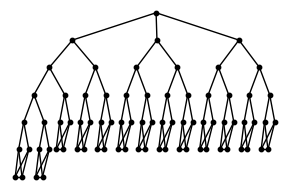

In [7]:
for n in range(70, 77, 2):
    show_build_tree_tree_layout(n, root=0, figsize=[3,3])

In [8]:
for n in range(16,201, 2):
    if subpath_number(build_caterpillar(n)) != subpath_number(build_tree(n)):
        print(f"Grafa se ne ujemata za n 0 {n}")

In [5]:
for n in range(16, 41, 2):
    Ln = Ln_graph(n)
    T = build_tree(n)
    C1 = build_caterpillar(n)
    C2 = build_caterpillar2(n)
    pnLn = subpath_number(Ln)
    pnT = subpath_number(T)
    pnC1 = subpath_number(C1)
    pnC2 = subpath_number(C2)

    print(f"n = {n} | pn(Ln) = {pnLn} | pn(Tree) = {pnT} | pn(Cat1) = {pnC1} | pn(Cat2) = {pnC2}")

n = 16 | pn(Ln) = 12744 | pn(Tree) = 3640 | pn(Cat1) = 3640 | pn(Cat2) = 3640
n = 18 | pn(Ln) = 22532 | pn(Tree) = 7072 | pn(Cat1) = 7072 | pn(Cat2) = 7072
n = 20 | pn(Ln) = 51532 | pn(Tree) = 12816 | pn(Cat1) = 12816 | pn(Cat2) = 11708
n = 22 | pn(Ln) = 90760 | pn(Tree) = 7156 | pn(Cat1) = 7156 | pn(Cat2) = 7156
n = 24 | pn(Ln) = 206800 | pn(Tree) = 12220 | pn(Cat1) = 12220 | pn(Cat2) = 12220
n = 26 | pn(Ln) = 363788 | pn(Tree) = 19596 | pn(Cat1) = 19596 | pn(Cat2) = 19064
n = 28 | pn(Ln) = 827988 | pn(Tree) = 11824 | pn(Cat1) = 11824 | pn(Cat2) = 11824
n = 30 | pn(Ln) = 1456016 | pn(Tree) = 18520 | pn(Cat1) = 18520 | pn(Cat2) = 18520
n = 32 | pn(Ln) = 3312856 | pn(Tree) = 27528 | pn(Cat1) = 27528 | pn(Cat2) = 27572
n = 34 | pn(Ln) = 5825044 | pn(Tree) = 17644 | pn(Cat1) = 17644 | pn(Cat2) = 17644
n = 36 | pn(Ln) = 13252444 | pn(Tree) = 25972 | pn(Cat1) = 25972 | pn(Cat2) = 25972
n = 38 | pn(Ln) = 23301272 | pn(Tree) = 36612 | pn(Cat1) = 36612 | pn(Cat2) = 37232
n = 40 | pn(Ln) = 5301

In [6]:
for n in range(14,101, 6):
    C1 = build_caterpillar(n)
    C2 = build_caterpillar2(n)
    pnC1 = subpath_number(C1)
    pnC2 = subpath_number(C2)

    print(f"n = {n} | pn(Cat1) = {pnC1} | pn(Cat2) = {pnC2}")

n = 14 | pn(Cat1) = 7188 | pn(Cat2) = 5504
n = 20 | pn(Cat1) = 12816 | pn(Cat2) = 11708
n = 26 | pn(Cat1) = 19596 | pn(Cat2) = 19064
n = 32 | pn(Cat1) = 27528 | pn(Cat2) = 27572
n = 38 | pn(Cat1) = 36612 | pn(Cat2) = 37232
n = 44 | pn(Cat1) = 46848 | pn(Cat2) = 48044
n = 50 | pn(Cat1) = 58236 | pn(Cat2) = 60008
n = 56 | pn(Cat1) = 70776 | pn(Cat2) = 73124
n = 62 | pn(Cat1) = 84468 | pn(Cat2) = 87392
n = 68 | pn(Cat1) = 99312 | pn(Cat2) = 102812
n = 74 | pn(Cat1) = 115308 | pn(Cat2) = 119384
n = 80 | pn(Cat1) = 132456 | pn(Cat2) = 137108
n = 86 | pn(Cat1) = 150756 | pn(Cat2) = 155984
n = 92 | pn(Cat1) = 170208 | pn(Cat2) = 176012
n = 98 | pn(Cat1) = 190812 | pn(Cat2) = 197192



=== ZAČENJAM n = 16 ===
[AUTO] mean_dE=3576.97, T0=5160.48, T_end=200.00, alpha=0.999837
Korak 2000, T=3728.4124, E=35424, best_E=3640, sprejetih slabših = 470/1409 (33.36 %)
Korak 4000, T=2693.7541, E=16080, best_E=3640, sprejetih slabših = 277/1565 (17.70 %)
Korak 6000, T=1946.2201, E=17380, best_E=3640, sprejetih slabših = 243/1630 (14.91 %)
Korak 8000, T=1406.1316, E=3640, best_E=3640, sprejetih slabših = 95/1759 (5.40 %)
Korak 10000, T=1015.9211, E=3640, best_E=3640, sprejetih slabših = 4/1840 (0.22 %)
Korak 12000, T=733.9965, E=3640, best_E=3640, sprejetih slabših = 0/1843 (0.00 %)
Korak 14000, T=530.3078, E=3640, best_E=3640, sprejetih slabših = 0/1854 (0.00 %)
Korak 16000, T=383.1440, E=3640, best_E=3640, sprejetih slabših = 0/1854 (0.00 %)
Korak 18000, T=276.8191, E=3640, best_E=3640, sprejetih slabših = 0/1854 (0.00 %)
Korak 20000, T=200.0000, E=3640, best_E=3640, sprejetih slabših = 0/1846 (0.00 %)
Zaključil n=16 | pn(T)=3640 | Best_E=3640 | čas=00:01:13.377s


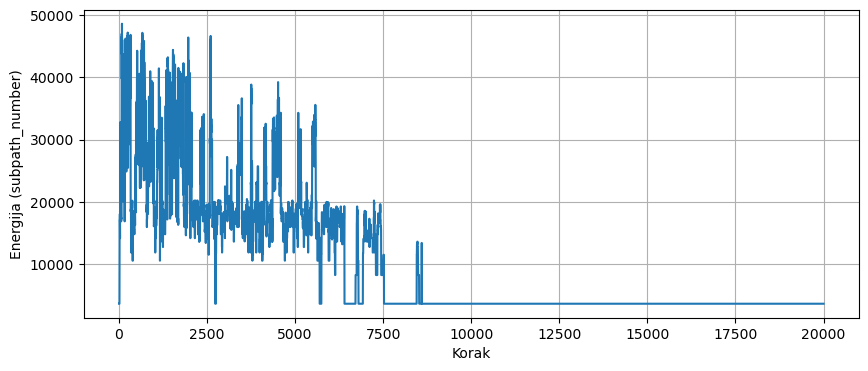


=== ZAČENJAM n = 18 ===
[AUTO] mean_dE=7791.68, T0=11241.01, T_end=200.00, alpha=0.999799
Korak 2000, T=7513.2514, E=38776, best_E=7072, sprejetih slabših = 423/1481 (28.56 %)
Korak 4000, T=5021.6955, E=38868, best_E=7072, sprejetih slabših = 283/1610 (17.58 %)
Korak 6000, T=3356.3931, E=18208, best_E=7072, sprejetih slabših = 189/1736 (10.89 %)
Korak 8000, T=2243.3409, E=7296, best_E=7072, sprejetih slabših = 92/1801 (5.11 %)
Korak 10000, T=1499.4008, E=7072, best_E=7072, sprejetih slabših = 53/1814 (2.92 %)
Korak 12000, T=1002.1672, E=7072, best_E=7072, sprejetih slabših = 35/1831 (1.91 %)
Korak 14000, T=669.8270, E=7488, best_E=7072, sprejetih slabših = 41/1810 (2.27 %)
Korak 16000, T=447.6979, E=7296, best_E=7072, sprejetih slabših = 27/1852 (1.46 %)
Korak 18000, T=299.2317, E=7072, best_E=7072, sprejetih slabših = 23/1853 (1.24 %)
Korak 20000, T=200.0000, E=7692, best_E=7072, sprejetih slabših = 24/1843 (1.30 %)
Zaključil n=18 | pn(T)=7072 | Best_E=7072 | čas=00:02:38.106s


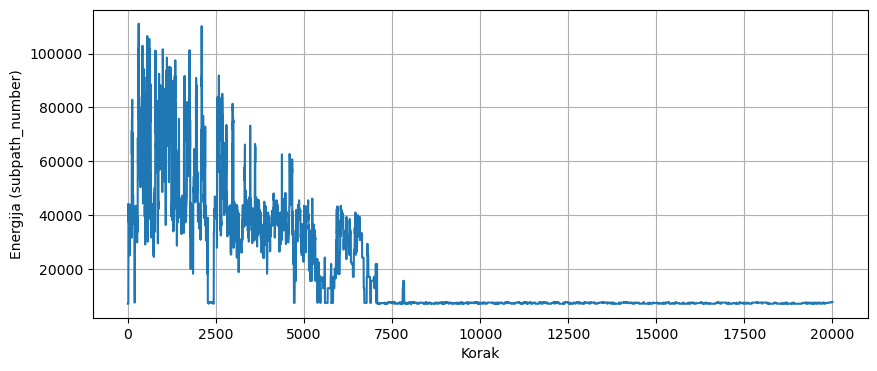


=== ZAČENJAM n = 20 ===
[AUTO] mean_dE=19053.00, T0=27487.67, T_end=200.00, alpha=0.999754
Korak 2000, T=16800.6899, E=92660, best_E=12816, sprejetih slabših = 427/1498 (28.50 %)
Korak 4000, T=10268.7203, E=80892, best_E=12816, sprejetih slabših = 307/1600 (19.19 %)
Korak 6000, T=6276.3266, E=12816, best_E=12768, sprejetih slabših = 197/1696 (11.62 %)
Korak 8000, T=3836.1426, E=16172, best_E=11708, sprejetih slabših = 60/1821 (3.29 %)
Korak 10000, T=2344.6820, E=15940, best_E=11708, sprejetih slabših = 84/1803 (4.66 %)
Korak 12000, T=1433.0890, E=14012, best_E=11708, sprejetih slabših = 64/1820 (3.52 %)
Korak 14000, T=875.9158, E=15556, best_E=11708, sprejetih slabših = 22/1854 (1.19 %)
Korak 16000, T=535.3670, E=11708, best_E=11708, sprejetih slabših = 9/1855 (0.49 %)
Korak 18000, T=327.2207, E=11708, best_E=11708, sprejetih slabših = 2/1878 (0.11 %)
Korak 20000, T=200.0000, E=11708, best_E=11708, sprejetih slabših = 0/1881 (0.00 %)
Zaključil n=20 | pn(T)=12816 | Best_E=11708 | čas=0

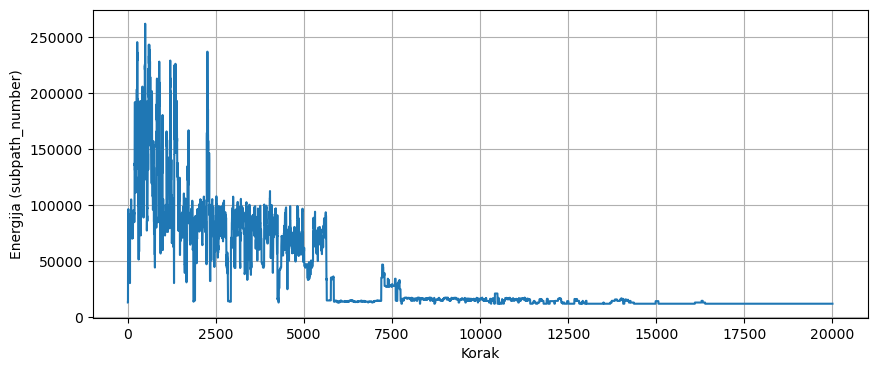


=== ZAČENJAM n = 22 ===
[AUTO] mean_dE=37652.52, T0=54321.10, T_end=200.00, alpha=0.999720
Korak 2000, T=31015.2101, E=314304, best_E=7156, sprejetih slabših = 441/1500 (29.40 %)
Korak 4000, T=17708.4630, E=23852, best_E=7156, sprejetih slabših = 244/1686 (14.47 %)
Korak 6000, T=10110.8347, E=29160, best_E=7156, sprejetih slabših = 79/1827 (4.32 %)
Korak 8000, T=5772.8882, E=25448, best_E=7156, sprejetih slabših = 97/1800 (5.39 %)
Korak 10000, T=3296.0917, E=29984, best_E=7156, sprejetih slabših = 102/1839 (5.55 %)
Korak 12000, T=1881.9385, E=21636, best_E=7156, sprejetih slabših = 59/1829 (3.23 %)
Korak 14000, T=1074.5127, E=23304, best_E=7156, sprejetih slabših = 47/1842 (2.55 %)
Korak 16000, T=613.5044, E=22184, best_E=7156, sprejetih slabših = 22/1867 (1.18 %)
Korak 18000, T=350.2869, E=20580, best_E=7156, sprejetih slabših = 9/1874 (0.48 %)
Korak 20000, T=200.0000, E=20580, best_E=7156, sprejetih slabših = 6/1877 (0.32 %)
Zaključil n=22 | pn(T)=7156 | Best_E=7156 | čas=00:09:31.3

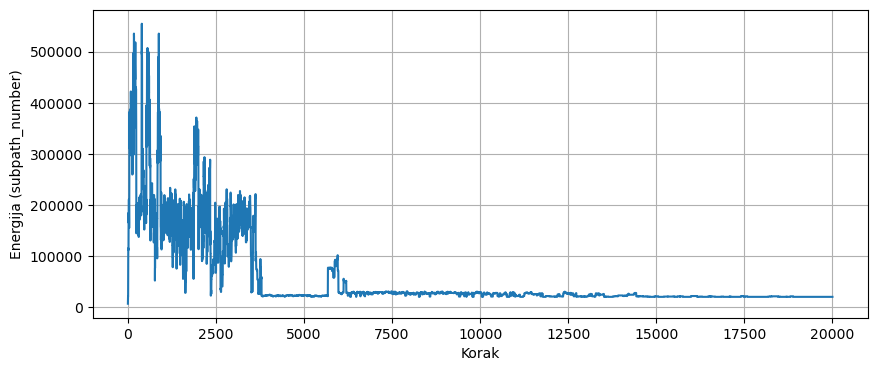


=== ZAČENJAM n = 24 ===
[AUTO] mean_dE=88831.60, T0=128156.91, T_end=200.00, alpha=0.999677
Korak 2000, T=67153.8352, E=349820, best_E=12220, sprejetih slabših = 488/1490 (32.75 %)
Korak 4000, T=35188.4079, E=279128, best_E=12220, sprejetih slabših = 286/1629 (17.56 %)
Korak 6000, T=18438.6200, E=56604, best_E=12220, sprejetih slabših = 138/1775 (7.77 %)
Korak 8000, T=9661.7815, E=56864, best_E=12220, sprejetih slabših = 111/1808 (6.14 %)
Korak 10000, T=5062.7445, E=50424, best_E=12220, sprejetih slabših = 69/1855 (3.72 %)
Korak 12000, T=2652.8629, E=12220, best_E=12220, sprejetih slabših = 23/1883 (1.22 %)
Korak 14000, T=1390.0922, E=12540, best_E=12220, sprejetih slabših = 18/1884 (0.96 %)
Korak 16000, T=728.4041, E=12828, best_E=12220, sprejetih slabših = 12/1882 (0.64 %)
Korak 18000, T=381.6816, E=12220, best_E=12220, sprejetih slabših = 15/1899 (0.79 %)
Korak 20000, T=200.0000, E=12540, best_E=12220, sprejetih slabših = 8/1893 (0.42 %)
Zaključil n=24 | pn(T)=12220 | Best_E=12220 

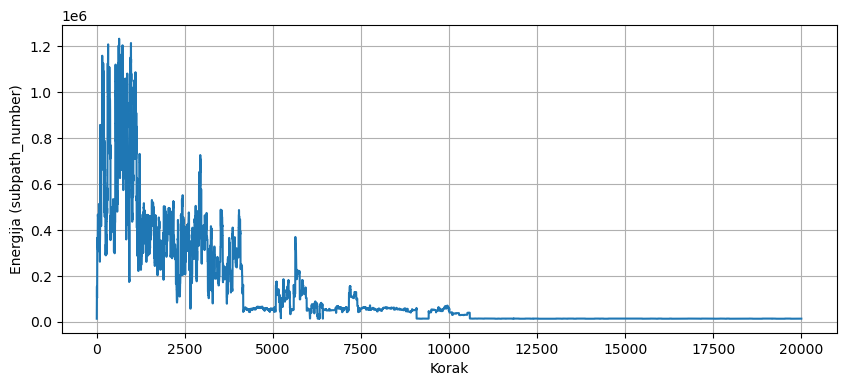


=== ZAČENJAM n = 26 ===
[AUTO] mean_dE=231058.72, T0=333347.27, T_end=200.00, alpha=0.999629
Korak 2000, T=158748.7105, E=992916, best_E=19596, sprejetih slabših = 488/1416 (34.46 %)
Korak 4000, T=75600.2995, E=483268, best_E=19596, sprejetih slabših = 324/1612 (20.10 %)
Korak 6000, T=36002.8455, E=127380, best_E=19596, sprejetih slabših = 166/1753 (9.47 %)
Korak 8000, T=17145.4993, E=71016, best_E=19596, sprejetih slabših = 131/1810 (7.24 %)
Korak 10000, T=8165.1364, E=79240, best_E=19596, sprejetih slabših = 72/1855 (3.88 %)
Korak 12000, T=3888.4521, E=20476, best_E=19596, sprejetih slabših = 57/1854 (3.07 %)
Korak 14000, T=1851.7829, E=19596, best_E=19596, sprejetih slabših = 34/1864 (1.82 %)
Korak 16000, T=881.8676, E=20476, best_E=19596, sprejetih slabših = 28/1859 (1.51 %)
Korak 18000, T=419.9685, E=19596, best_E=19596, sprejetih slabših = 17/1916 (0.89 %)
Korak 20000, T=200.0000, E=19596, best_E=19596, sprejetih slabših = 9/1892 (0.48 %)
Zaključil n=26 | pn(T)=19596 | Best_E=19

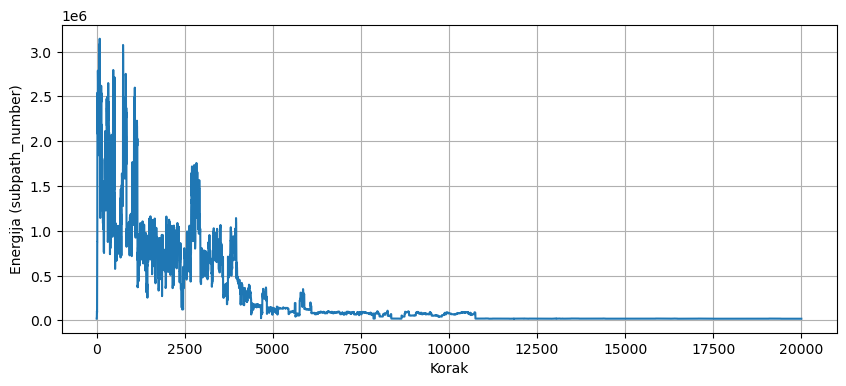

In [15]:
for n in range(16, 27, 2):

    print(f"\n=== ZAČENJAM n = {n} ===")
    
    if n >= 16:
        T = build_tree(n)
        pnT = subpath_number(T)
    else:
        continue

    start = time.time()
    best_G, best_E, history = simulated_annealing_subpath(
        T,
        steps=20000,
        max_tries=1000,
        T_end_target=200,
        verbose=True
    )
    elapsed = time.time() - start

    print(f"Zaključil n={n} | pn(T)={pnT} | Best_E={best_E} | čas={encode_time_hms(elapsed)}s")
    plt.figure(figsize=(10, 4))
    plt.plot(history)
    plt.xlabel("Korak")
    plt.ylabel("Energija (subpath_number)")
    #plt.title(f"n = {n} | Potek energije med simulated annealing")
    plt.grid(True)
    plt.show()


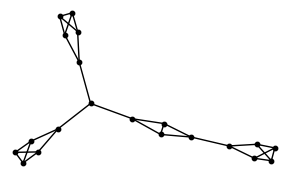

In [88]:
best_G.show(
            vertex_size=10,
            vertex_color="black",
            vertex_labels=False,
            edge_thickness=1,
            figsize=[3, 5],
            iterations=400
        )

In [4]:
folder = "Data"

file = "SA_results2.csv"
path = os.path.join(folder, file)
df = pd.read_csv(path)
grafi = df["best_G"].tolist()

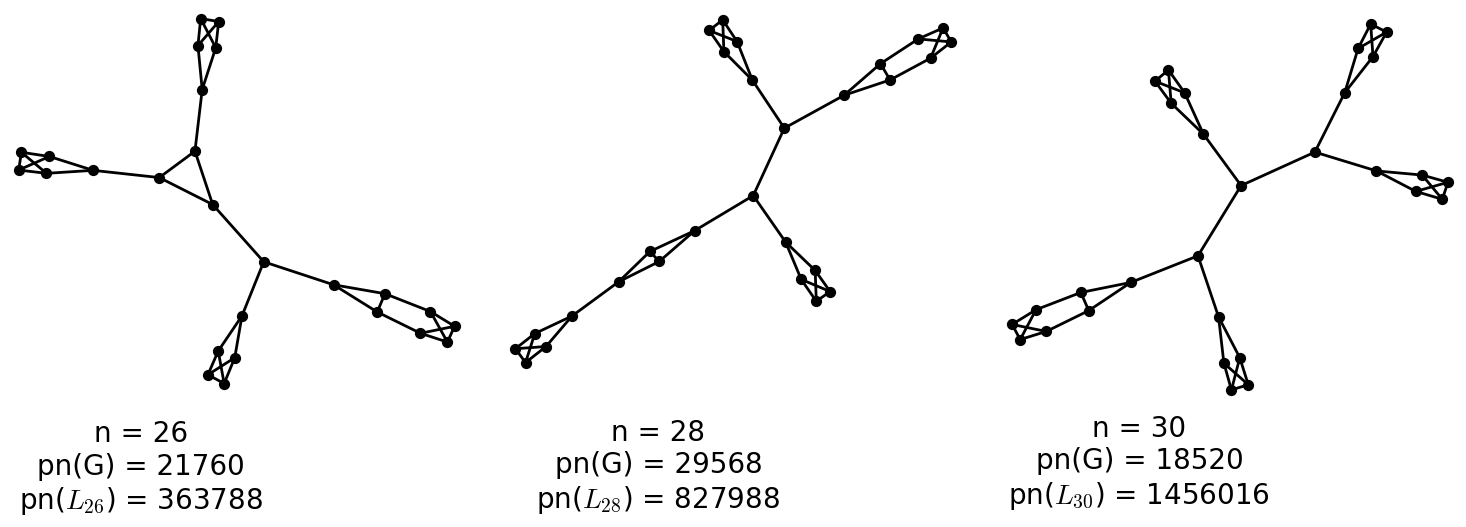

In [111]:
plots = []
for G6 in grafi[8:]:
    G = Graph(G6)
    n = G.num_verts()
    pnLn = subpath_number(Ln_graph(n))
    pnG = subpath_number(G)
    # narisan graf
    Gplot = G.plot(
        layout="spring",
        vertex_size=50,
        vertex_color="black",
        vertex_labels=False,
        edge_thickness=2,
        iterations=500
    )

    # izklopimo osi, da so grafi čisti
    Gplot.axes(False)
    # naslov nad grafom (v relativnih koordinatah figure)
    title = text(
        f"n = {n}\npn(G) = {pnG}\npn($L_{{{n}}}$) = {pnLn}",
        (1.5, -1),
        horizontal_alignment='center',
        color='black',
        fontsize=20
    )
    plots.append(Gplot + title)

row1 = plots

GA = graphics_array([row1])
GA.show(figsize=(15, 8), axes=False)